# Part I - Analyses of San Francisco Ford GoBike System Data
## by Marko Schmidt

## Introduction
In the follwing analysis I will have a closer look at data from the Ford GoBike System bikeshare Data to answer my questions of interests and find more meaningful insights for further use to improve the business.

## Preliminary Wrangling

In [69]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sys
%matplotlib inline

## Gather

In [70]:
# Load datasets
df_jan19 = pd.read_csv('201901-fordgobike-tripdata.csv') 
df_feb19 = pd.read_csv('201902-fordgobike-tripdata.csv')
df_mar19 = pd.read_csv('201903-fordgobike-tripdata.csv')

## Access

In [71]:
# Access January data 
df_jan19.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No


In [72]:
# Access main information from January data 
df_jan19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192082 entries, 0 to 192081
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             192082 non-null  int64  
 1   start_time               192082 non-null  object 
 2   end_time                 192082 non-null  object 
 3   start_station_id         191834 non-null  float64
 4   start_station_name       191834 non-null  object 
 5   start_station_latitude   192082 non-null  float64
 6   start_station_longitude  192082 non-null  float64
 7   end_station_id           191834 non-null  float64
 8   end_station_name         191834 non-null  object 
 9   end_station_latitude     192082 non-null  float64
 10  end_station_longitude    192082 non-null  float64
 11  bike_id                  192082 non-null  int64  
 12  user_type                192082 non-null  object 
 13  bike_share_for_all_trip  192082 non-null  object 
dtypes: f

In [73]:
# Access main information from February data 
df_feb19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  bike_share_for_all_trip  183412 non-null  object 
dtypes: f

In [74]:
# Access main information from March data 
df_mar19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256299 entries, 0 to 256298
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             256299 non-null  int64  
 1   start_time               256299 non-null  object 
 2   end_time                 256299 non-null  object 
 3   start_station_id         256078 non-null  float64
 4   start_station_name       256078 non-null  object 
 5   start_station_latitude   256299 non-null  float64
 6   start_station_longitude  256299 non-null  float64
 7   end_station_id           256078 non-null  float64
 8   end_station_name         256078 non-null  object 
 9   end_station_latitude     256299 non-null  float64
 10  end_station_longitude    256299 non-null  float64
 11  bike_id                  256299 non-null  int64  
 12  user_type                256299 non-null  object 
 13  bike_share_for_all_trip  256299 non-null  object 
dtypes: f

**Cleaning Tasks:**
* Merge all 3 tables (df_jan19, df_feb19, df_mar19)
* Convert column start_time, end_time to datetime
* Extract month and day of week from start_time to create new columns
* Extract 'Hour of the day' from start_time
* Extract the date from the 'start_time' column
* Define a function for the repeated code to add axis label and title to all plots

## Clean

#### Merge all 3 tables 

#### Define

Merge all 3 tables (df_jan19, df_feb19, df_mar19) with concat() function

#### Code

In [75]:
df_merged = pd.concat([df_jan19, df_feb19, df_mar19], axis=0)

#### Test

In [76]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631793 entries, 0 to 256298
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             631793 non-null  int64  
 1   start_time               631793 non-null  object 
 2   end_time                 631793 non-null  object 
 3   start_station_id         631127 non-null  float64
 4   start_station_name       631127 non-null  object 
 5   start_station_latitude   631793 non-null  float64
 6   start_station_longitude  631793 non-null  float64
 7   end_station_id           631127 non-null  float64
 8   end_station_name         631127 non-null  object 
 9   end_station_latitude     631793 non-null  float64
 10  end_station_longitude    631793 non-null  float64
 11  bike_id                  631793 non-null  int64  
 12  user_type                631793 non-null  object 
 13  bike_share_for_all_trip  631793 non-null  object 
dtypes: f

#### Convert column start_time, end_time to datetime and column member_birth_year to integer

#### Define

Use to_datetime() method to convert columns start_time and end_time to datetime

#### Code

In [77]:
# convert start_time to datetime
df_merged['start_time'] = pd.to_datetime(df_merged['start_time'])

# convert end_time to datetime
df_merged['end_time'] = pd.to_datetime(df_merged['end_time'])

#### Test

In [78]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631793 entries, 0 to 256298
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             631793 non-null  int64         
 1   start_time               631793 non-null  datetime64[ns]
 2   end_time                 631793 non-null  datetime64[ns]
 3   start_station_id         631127 non-null  float64       
 4   start_station_name       631127 non-null  object        
 5   start_station_latitude   631793 non-null  float64       
 6   start_station_longitude  631793 non-null  float64       
 7   end_station_id           631127 non-null  float64       
 8   end_station_name         631127 non-null  object        
 9   end_station_latitude     631793 non-null  float64       
 10  end_station_longitude    631793 non-null  float64       
 11  bike_id                  631793 non-null  int64         
 12  user_type       

#### Extract month and day of week from start_time and 'Hour of the day' from start_time to create new columns 

#### Define

Use dt.month and dt.day_name and dt.hour functions to create new columns

#### Code

In [79]:
# Extract month
df_merged['month'] = df_merged['start_time'].dt.strftime('%B')

# Extract day of the week
df_merged['day_of_week'] = df_merged['start_time'].dt.day_name()

# Extract hour of day
df_merged['our_of_day'] = df_merged['start_time'].dt.hour

#### Test

In [80]:
df_merged.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,month,day_of_week,our_of_day
169027,313,2019-02-04 12:36:42.917,2019-02-04 12:41:56.713,243.0,Bancroft Way at College Ave,37.869360,-122.254337,249.0,Russell St at College Ave,37.858473,-122.253253,958,Subscriber,No,February,Monday,12
184376,206,2019-03-11 15:33:58.962,2019-03-11 15:37:25.088,160.0,West Oakland BART Station,37.805318,-122.294837,235.0,Union St at 10th St,37.807239,-122.289370,1835,Subscriber,No,March,Monday,15
96743,425,2019-02-15 09:50:43.312,2019-02-15 09:57:49.128,267.0,Derby St at College Ave,37.861804,-122.253569,171.0,Rockridge BART Station,37.844279,-122.251900,5256,Customer,No,February,Friday,9
72847,673,2019-02-19 15:29:45.390,2019-02-19 15:40:58.815,339.0,Jackson St at 11th St,37.800002,-122.266438,187.0,Jack London Square,37.796248,-122.279352,5906,Subscriber,Yes,February,Tuesday,15
53138,1336,2019-01-25 13:02:47.443,2019-01-25 13:25:03.558,145.0,29th St at Church St,37.743684,-122.426806,19.0,Post St at Kearny St,37.788975,-122.403452,5288,Subscriber,No,January,Friday,13


#### Extract the date from the 'start_time' column

#### Define

 Extract the date from the 'start_time' column and create a new column 'start_date'.

#### Code

In [81]:
df_merged['start_date'] = df_merged['start_time'].dt.date

#### Test

In [82]:
df_merged.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,month,day_of_week,our_of_day,start_date
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,No,January,Thursday,17,2019-01-31


In [83]:
# Calculation the center of trip duration with median
avg_trip_duration = round(df_merged['duration_sec'].median(),)
print('The avergage trip duration is', avg_trip_duration, 'seconds.')

The avergage trip duration is 529 seconds.


In [84]:
# Export merged dataset as csv file
df_merged.to_csv('ford_gobike_data_merged.csv', index=False)

#### Define a function for the repeated code to add axis label and title to all plots

In [85]:
def x_y_t(xL, yL, title):
    plt.title(title)
    plt.xlabel(xL)
    plt.ylabel(yL)
color = sb.color_palette()[2]

### What is the structure of your dataset?

The dataset has a tabular structure with 77 rows and 16 columns. Each row represents a single bike ride with a start- and end station, duration of the ride, start- and endtime, bike id, type of user (subcriber or customer), member birth year and gender. The columns have specific data types, such as integers, strings and floats.

### What is/are the main feature(s) of interest in your dataset?

My main features of interest in the dataset are:

* Duration
* Starttime
* Start- and Endtation
* Usertype

By examining this features, I aim to understand their relationships, patterns, and trends and draw meaningful conclusion from the data.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Supporting features could be:

* Day of the week
* Hour of the day
* Station information

## Univariate Exploration

#### Question

How many Users are in each User Type?

#### Visualization

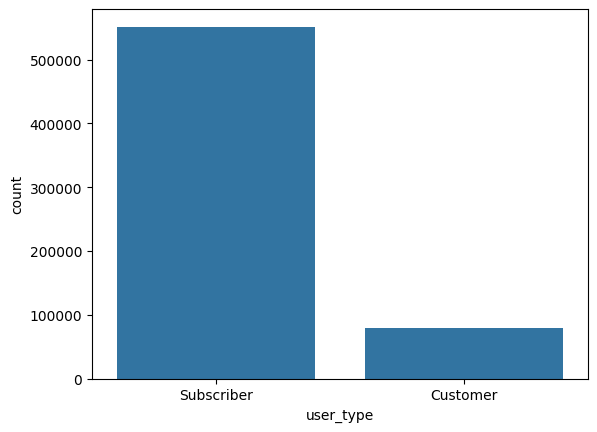

In [86]:
# Choose the first tuble of RGB colors
base_color = sb.color_palette()[0]

# plot bar chart
sb.countplot(data=df_merged, x='user_type', color=base_color);

#### Observation

Where are a significant higher amount of subscibers.

#### Question

How is the duration average distributed within the user type?

#### Visualization

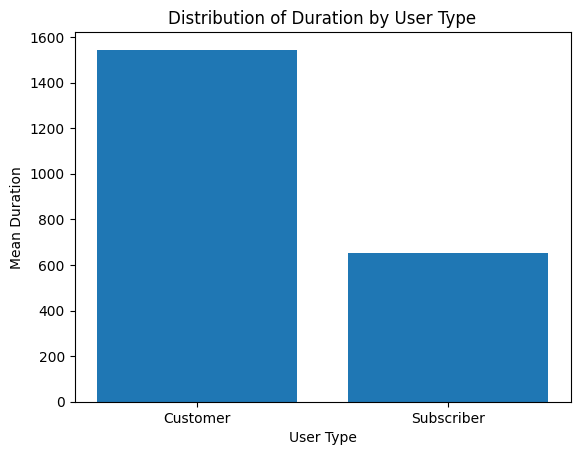

In [87]:
# group data
grouped_data = df_merged.groupby('user_type')['duration_sec'].mean()

# plot data
plt.bar(grouped_data.index, grouped_data)

# Use of Function to create axes and title for the plot
x_y_t('User Type', 'Mean Duration', 'Distribution of Duration by User Type')

#### Observation

Customers have an much higher duration on average than subscibers.

#### Question

What are the 20 most common start stations?

#### Visualization  

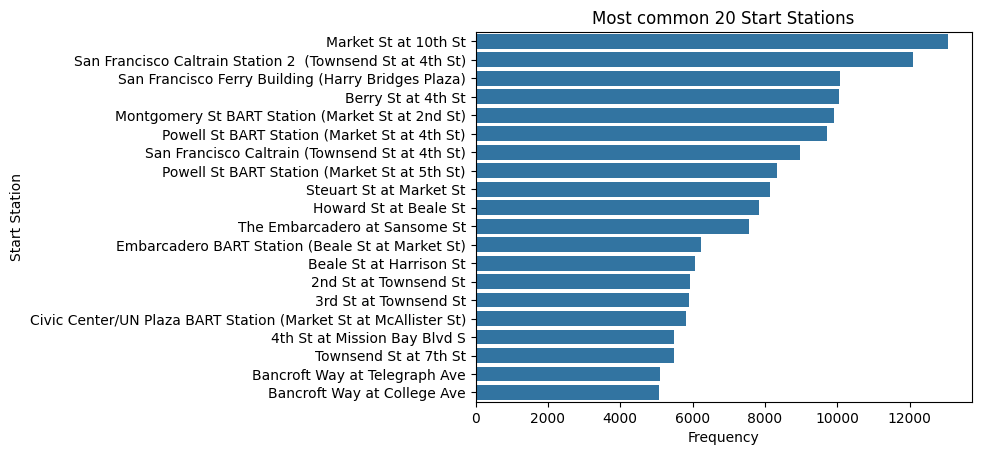

In [88]:
# create horizontal bar chart
start_stations_counts = df_merged['start_station_name'].value_counts()
sb.barplot(x=start_stations_counts.head(20).values, y=start_stations_counts.head(20).index, orient='h', color=base_color)

# Use of Function to create axes and title for the plot
x_y_t('Frequency', 'Start Station', 'Most common 20 Start Stations')

#### Observation

The most common start station is 'Market St at 10th St'.

#### Question

What are the 20 most common end stations?

#### Visualization

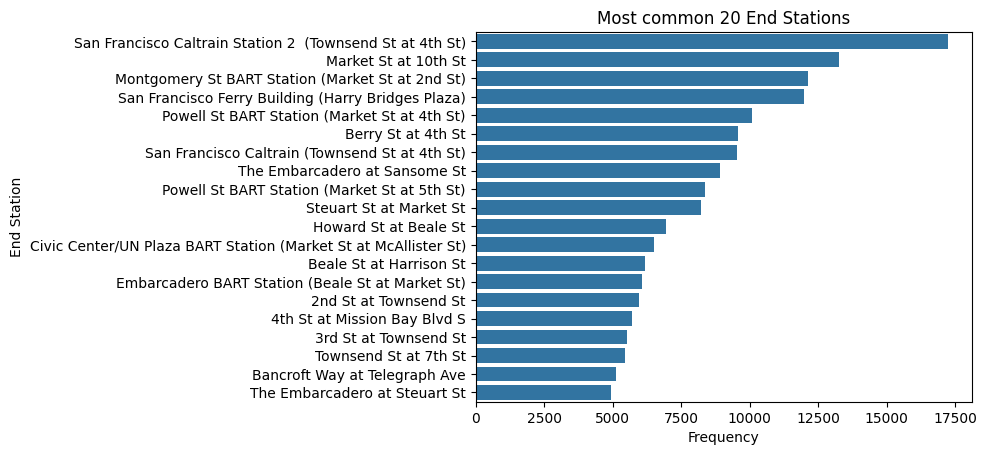

In [89]:
# create horizontal bar chart
end_stations_counts = df_merged['end_station_name'].value_counts()
sb.barplot(x=end_stations_counts.head(20).values, y=end_stations_counts.head(20).index, orient='h', color=base_color)

# Use of Function to create axes and title for the plot
x_y_t('Frequency', 'End Station', 'Most common 20 End Stations')

#### Observation

The most common End Station is San Francisco Caltrain Station 2. The most common Start Station Market St at 10th St is also the 2nd most common End Station.

#### Question

How is the duration distributed?

#### Visualization

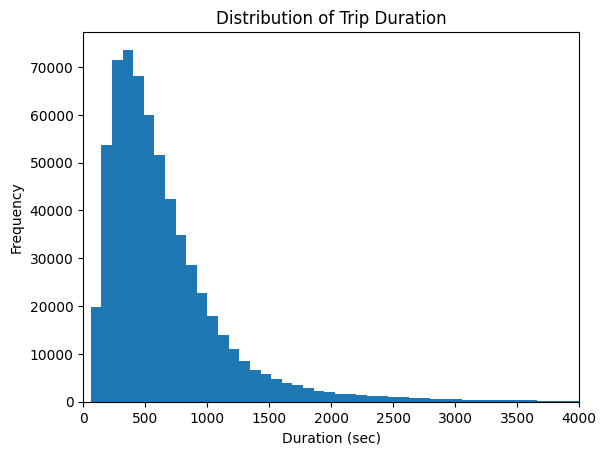

In [90]:
# Create a histogram
plt.hist(data=df_merged, x='duration_sec', bins= 1000)

plt.xlim(0, 4000)

# Use of Function to create axes and title for the plot
x_y_t('Duration (sec)', 'Frequency', 'Distribution of Trip Duration')

In [91]:
# How long did the shortest trip took?
shortes_trip = df_merged['duration_sec'].min()
print('The shortest trip took',shortes_trip,'seconds.') 

The shortest trip took 61 seconds.


#### Observation

Most of trip duration are 0 and 1000 sec per trip. The distribution is scewed to the right.

#### Question

In which month did the most trips take place?

#### Visualization

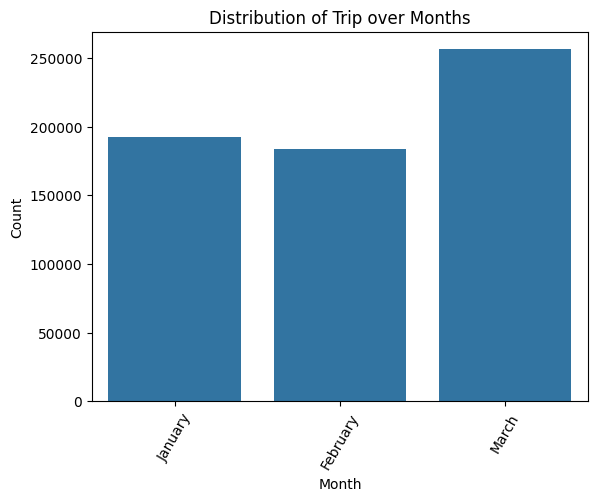

In [92]:
# Create a barchart
sb.countplot(data = df_merged, x='month', color=base_color, order=['January', 'February', 'March'])
plt.xticks(rotation=60)

# Use of Function to create axes and title for the plot
x_y_t('Month', 'Count', 'Distribution of Trip over Months');

#### Observation

The month where to most trips taken is march.

#### Question

How are the trips distributed on the day of the weeks?

#### Visualization

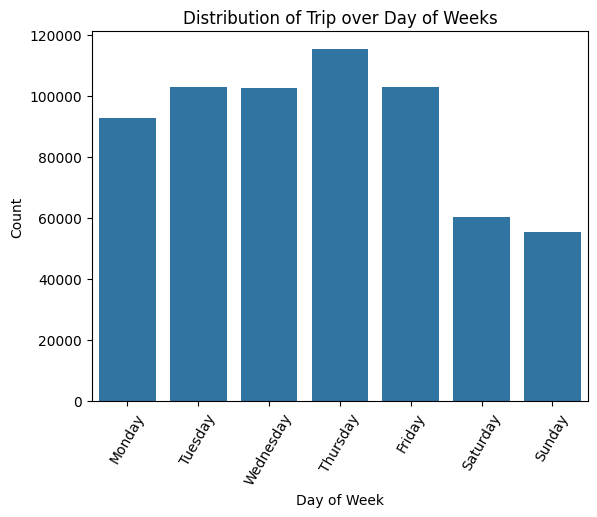

In [93]:
# Create a barchart
sb.countplot(data = df_merged, x='day_of_week', color=base_color, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=60);

# Use of Function to create axes and title for the plot
x_y_t('Day of Week', 'Count', 'Distribution of Trip over Day of Weeks')

#### Observation

Thursday is the day of the week with the most trips taken. On weekend there are less trips taken then on weekdays. 

#### Question

How are the trips distributed on the hour of the day?

#### Visualization

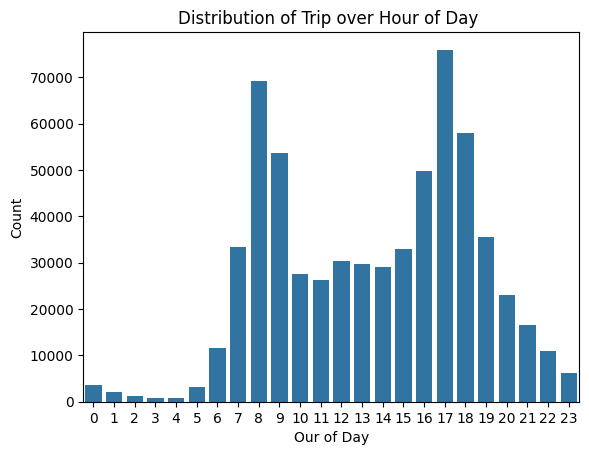

In [94]:
# Create a barchart
sb.countplot(data=df_merged, x='our_of_day', color=base_color);

# Use of Function to create axes and title for the plot
x_y_t('Our of Day', 'Count', 'Distribution of Trip over Hour of Day ')

#### Observation

There are peek hours around 7-9 am and 16-18 pm with more trips taken. Usally trips are taken on daytime. Much less at night.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There are 631793 Trips in the dataset with data January to March 2019 and 14 columns with different variables. Most of the user are subcribers and the mean duration of customers is higher. Apart from a few outlier (long trip duration), the average trip duration is 9 minutes. The most common day of the week is Thurdsday and there are some peek hours in the morning and afternoon. From my point of view there are no unusal observations. I didn´t need to perform any transformation. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I joined the three separately dataset to one merged dataset to have all data in one table for further investigation. I extracted 3 new columns (month, day of the week and hour of the week) from the start_time column to get a better understanding how trips are distributed on different time formats. 

## Bivariate Exploration

#### Question

How does the duration differ according to user type?

#### Visualization

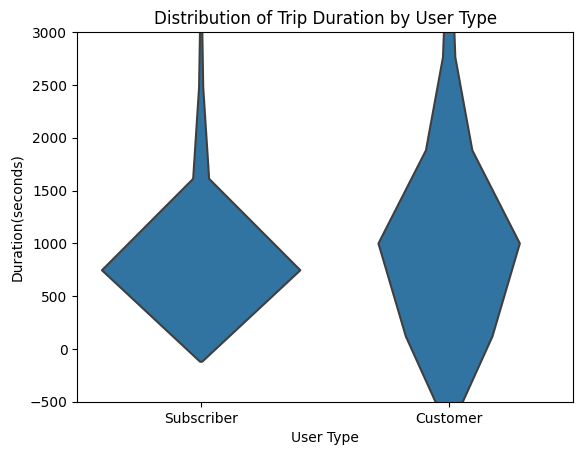

In [95]:
# User types
user_types = ['Subscriber', 'Customer']

# Returns the types for user_types with the categories and orderedness
user_classes = pd.api.types.CategoricalDtype(ordered=True, categories=user_types)

# Use pandas.astype() to convert the "user_type" column from a plain object type into an ordered categorical type
df_merged['user_type'] = df_merged['user_type'].astype(user_classes);

# Create violin  plot
sb.violinplot(data=df_merged, x='user_type', y='duration_sec', color=base_color, inner=None)
plt.ylim([-500, 3000])

# Use of Function to create axes and title for the plot
x_y_t('User Type', 'Duration(seconds)', 'Distribution of Trip Duration by User Type')

#### Observation

The duration values for subscribers are more widely distributed than for customers. This means that the spread of trip durations is wider for subscribers. There are more longer and shorter journeys than for customers.

#### Question

How does the amount of the day of the week rides differ to user types?

#### Vizualization

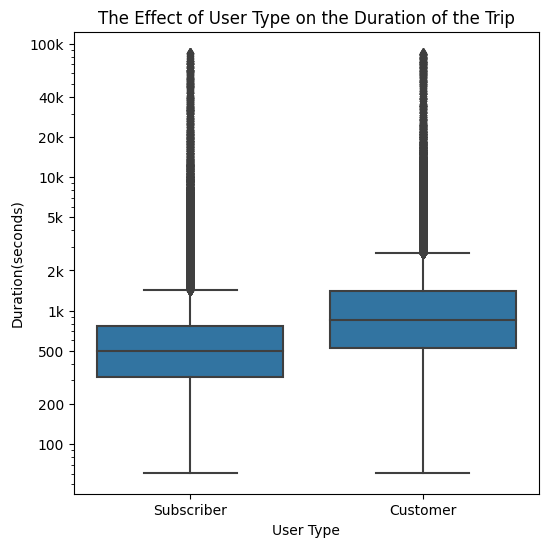

In [96]:
# Preparing plot
plt.figure(figsize=[6,6])
sb.boxplot(data=df_merged,x='user_type',y='duration_sec',color=base_color)
plt.yscale('log')
y_ticklocs=[100,200,500,1e3,2e3,5e3,10e3, 20e3, 40e3, 100e3]
y_ticklabels=['100','200','500','1k','2k','5k', '10k', '20k', '40k', '100k']
plt.yticks(y_ticklocs,y_ticklabels)

# Use of Function to create axes and title for the plot
x_y_t('User Type', 'Duration(seconds)', 'The Effect of User Type on the Duration of the Trip')


#### Observation

Customers seems to take longer trips then subscribers. There are serveral outliers for both user types.

#### Question

Which effect does duration have on day of the week?

#### Visualization

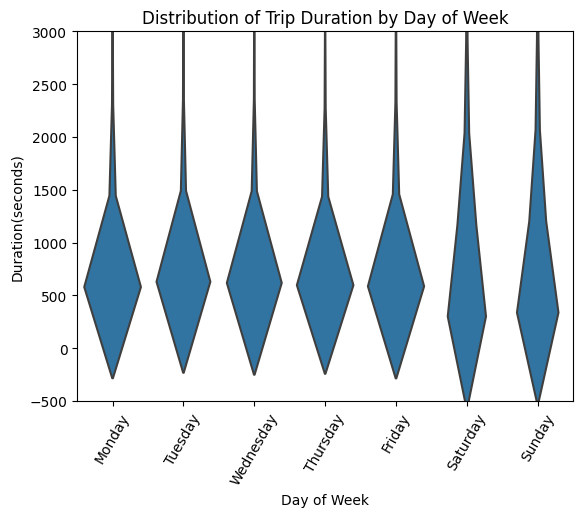

In [97]:
# User types
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Returns the types for user_types with the categories and orderedness
w_classes = pd.api.types.CategoricalDtype(ordered=True, categories=week_days)

# Use pandas.astype() to convert the "user_type" column from a plain object type into an ordered categorical type
df_merged['day_of_week'] = df_merged['day_of_week'].astype(w_classes);

# Create violin  plot
sb.violinplot(data=df_merged, x='day_of_week', y='duration_sec', color=base_color, inner=None)
plt.ylim([-500, 3000])
plt.xticks(rotation=60)

# Use of Function to create axes and title for the plot
x_y_t('Day of Week', 'Duration(seconds)', 'Distribution of Trip Duration by Day of Week')

#### Observation

The spread of trip lengths is wider on weekdays than at weekends. This could mean that users make more trips of the same distance at the weekend, while more shorter and longer trips are made during the week.

#### Question

How is the duration mean distributed over a daily time scale?

#### Visualization

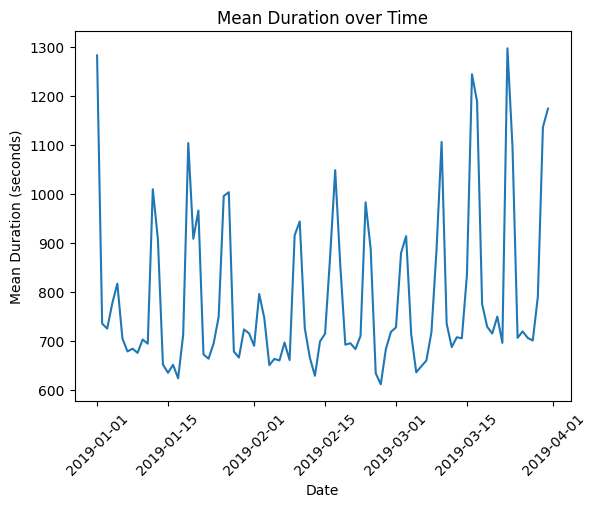

In [98]:
# Group the data by 'start_date' and calculate the mean of 'duration_sec'
daily_duration = df_merged.groupby('start_date')['duration_sec'].mean()

# plot the lineplot
plt.plot(daily_duration.index, daily_duration.values)
plt.xticks(rotation=45)

# Use of Function to create axes and title for the plot
x_y_t('Date', 'Mean Duration (seconds)', 'Mean Duration over Time')

#### Observation

Where are some peak days with a high duration on average. But the course of the curve is relatively even. At regular intervals, the average duration of the trips is higher than on other days. This could indicate a longer trip duration at the weekend.

#### Question

Which effect has bike sharing on duration?

#### Visualization

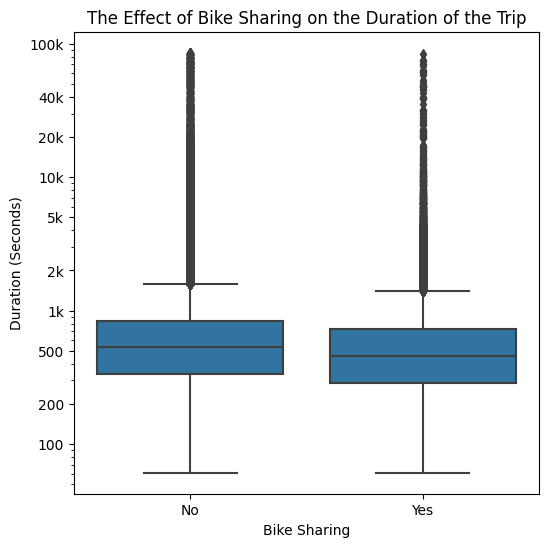

In [99]:
# Preparing plot
plt.figure(figsize=[6,6])
sb.boxplot(data=df_merged,x='bike_share_for_all_trip',y='duration_sec',color=base_color)
plt.yscale('log')
y_ticklocs=[100,200,500,1e3,2e3,5e3,10e3, 20e3, 40e3, 100e3]
y_ticklabels=['100','200','500','1k','2k','5k', '10k', '20k', '40k', '100k']
plt.yticks(y_ticklocs,y_ticklabels)

# Use of Function to create axes and title for the plot
x_y_t('Bike Sharing', 'Duration (Seconds)', 'The Effect of Bike Sharing on the Duration of the Trip')

#### Observation

User who don´t share bikes seems to take a bit longer trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Subscribers do have a wider spread of trip duration than customers. Whereas customers do take langer trips in general. The spread of the trip lenght is also wider on all weekdays compared to the weekend. Looking at a timescale for the mean duration confirms this observation because of a regular intervall curve. Users who don´t share tips do take longer trips as well. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I found it interesting, what users take more trips with a same lenght on weekends and an higher varity of trip lenght exists on weekdays.

## Multivariate Exploration

#### Question

How is the monthly trip duration distributed among the user types?

#### Visualization

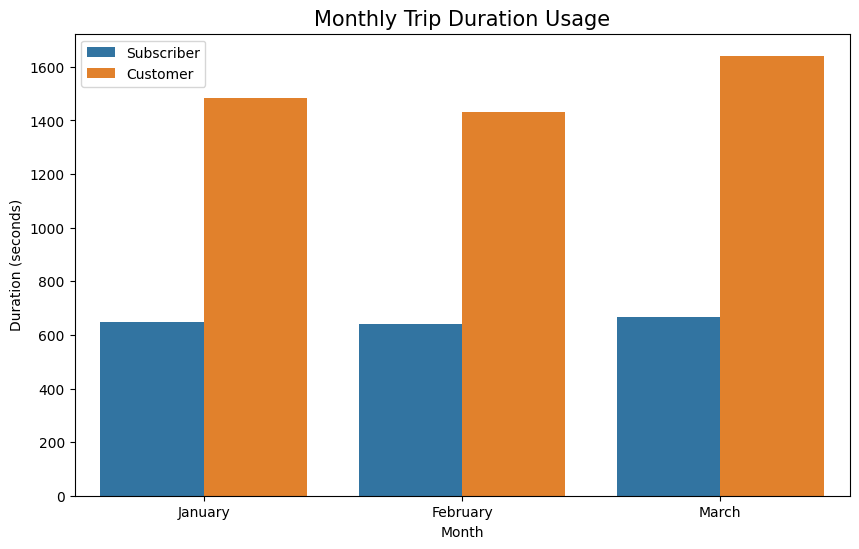

In [100]:
# Create clustered bar chart
plt.figure(figsize=(10,6))
plt.title('Monthly Trip Duration Usage', fontsize=15)
chart = sb.barplot(data=df_merged, x='month', y='duration_sec', order=['January', 'February', 'March'], hue='user_type', ci=None)
chart.set(xlabel='Month', ylabel='Duration (seconds)')
plt.gca().legend().set_title('');

#### Obervation

During all months customers do take longer trips. Subcribers are nearly on the same level of trip duration over time.

#### Question

How is the ourly trip duration distributed among the user types?

#### Visualization

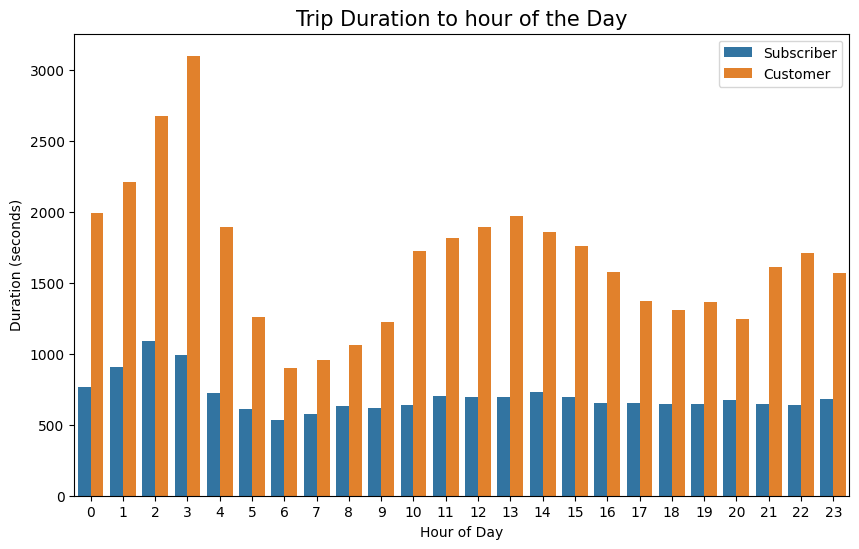

In [101]:
# Create clustered bar chart
plt.figure(figsize=(10,6))
plt.title('Trip Duration to hour of the Day', fontsize=15)
chart = sb.barplot(data=df_merged, x='our_of_day', y='duration_sec', hue='user_type', ci=None)
chart.set(xlabel='Hour of Day', ylabel='Duration (seconds)')
plt.gca().legend().set_title('');

#### Observation

The trip duration is in general longer at all hours of the day for customers. At night from 1-3 am it is much higher on average and from 5 to 9 am the difference between subcriber and customer is the smallest.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Looking at some data relations with multivariate exploration is strenghten the observation, that customers take longer trips other the months and hour of days. 

### Were there any interesting or surprising interactions between features?

I found it surprising that the duration of the trips differs depending on the time of day. There seem to be times of day when the duration of trips differs greatly between subcribers and customers (especially at night) and are quite close to each other in the early morning hours.

## Conclusions
With this analysis, I examined the duration of the trips, start time, start and end station and user type. I used the months of January, February and March from the year 2019. To be able to carry out the analysis, I completed a few cleaning tasks in advance. These included creating new columns and converting data formats. I focused my analysis on the main features Duration, Starttime, Start- and Endtation and Usertype. To better understand the main features I used the following supporting features named, Day of the week, Hour of the day and Station information.  I used the "Question-Visualization-Observations" framework  throughout the exploration. 

To sum up I can say, that there are a lot of interessting findings to use for deeper analysis and further questions that may lead to business action. Customers for example are taking much longer trips then subscribers. So the business question could be, how to increase the customer base to earn more money. Also the company could consider start and end location based on frequency of rental on this stations. Bicycles that are not ridden very often do not earn any money. The analysis could be supplemented by the remaining months of 2019 in order to analyze the trend of increasing journeys from March onwards. This information can help to better plan the number of bikes to be provided for next year. As there are fewer bikes in use at night and from 10 am to 3 pm, these times could be used for bike inspections and repairs. Customer surveys could be used to find out why users make more consistently long journeys at the weekend than during the week. This information could possibly be used to expand the marketing or product range and adapt it even more closely to the needs of users. It would also be interesting to find out why the trip length is equalized between subsciber and customer at certain times of the day.